# MSDS 422 Assignment 1 - House Prices: Advanced Regression Techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set()

## Import Data

In [2]:
# Create file path
main_file = os.path.join(os.getcwd(), 'train.csv')

# Load csv into pandas df
df = pd.read_csv(main_file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Part 1: Descriptive Statistics
Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Part 2: Investigate missing data and outliers.
### Checking for Nulls

In [18]:
# Create null data frame
nulls_df = df.isnull().sum().to_frame('nulls')

# Show all columns with null values
nulls_df = nulls_df.loc[nulls_df['nulls'] != 0]

# Sort by assendind order
nulls_df.sort_values(by=['nulls'], ascending=False)

,nulls
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


### There are a hand full of columns that contain a large amount of nulls, which can cause issues when trying to analyze the data. 

For now, we will drop these columns:
- Alley: Type of alley access
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories

#### Quick check to see if there is a corlation correlation between 'Alley', 'PoolQC', 'Fence', 'MiscFeature' and the 'SalePrice'

In [42]:
columns_check = df.isna().sum()
columns_check = columns_check[columns_check >= 1000]
c = list(columns_check.index)
c.append('SalePrice')
df[c].corr()

,SalePrice
SalePrice,1.0


#### No corlation due to lack of data, so we will drop the columns

In [43]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

### FireplaceQu also seems to have a large amount of nulls
Looking at the 'data_description.txt' file, column FireplaceQu (Fireplace quality) contains 'NaN' values to represent that the property does not have a fireplace. In this case, we wouldn't want to drop this column

Column values:
- Ex: Excellent - Exceptional Masonry Fireplace
- Gd: Good - Masonry Fireplace in main level
- TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa: Fair - Prefabricated Fireplace in basement
- Po: Poor - Ben Franklin Stove
- NA: No Fireplace

In [44]:
# FireplaceQu column value check
fp_check = df['FireplaceQu'].fillna('NA')
fp_check.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Let's change the 'NaN' values to 'NA' as a string since it is an actual value in our data set.

In [45]:
df['FireplaceQu'].fillna('NA', inplace=True)

# NaN check
print(f"Count of NaNs: {df['FireplaceQu'].isnull().sum()}")

Count of NaNs: 0


### I will now encode the categories to help visualize the corleation to sales price later
New encoding values:
- Ex: 5
- Gd: 4
- TA: 3
- Fa: 2
- Po: 1
- NA: 0

In [46]:
df['FireplaceQu'].replace({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

# Verify encoding
df['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

### Checking the remaining columns with NaNs and the corleation they have with SalesPrice

In [50]:
columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
df[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


## Check for Corleation with Dependent Variables

### FircepalceQu vs. SalesPrice

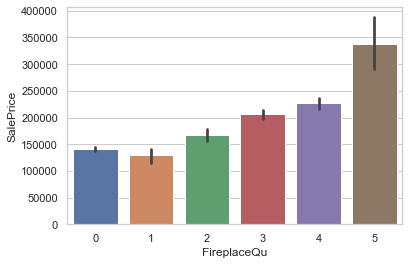

In [47]:
sns.set(style="whitegrid")
ax = sns.barplot(x='FireplaceQu', y="SalePrice", data=df)